Faire un preambule ce qui va faire le plan de soutenance

- analyse du fond
- de la forme
- des valeurs atypiques

- noter le probleme rencontrer comment tu l'a corrigé

- shape
- info
- describe
- remplissage des colonne (traitement des valeur null),
- valeur impossible
- aberante 

# Ce projet fonctionne avec les versions des package suivants:
- pandas 2.2.2
- matplotlib 3.9.0
- seaborn 0.13.2

## Ojectifs:
- Réaliser une analyse de données afin d'optimiser les tournées des personne d'entretien

## Installation Package

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement du DataSet à partir du fichier CSV

In [54]:
data= pd.read_csv("datas/p2-arbres-fr.csv", sep=";") #chargement du fichier CSV dans la variables data

## Analyse du jeu de données

### Identifier les types de données

**1-connaitre les dimensions de son dataset**

In [25]:
# dimension du dataset
dimension = data.shape
print(f"Le nombre de ligne du dataFrame {dimension[0]}")
print(f"Le nombre de colonne du dataFrame {dimension[1]}")

Le nombre de ligne du dataFrame 200137
Le nombre de colonne du dataFrame 18


**2- connnaitre la composition de son dataset**

In [28]:
# on identifie les colonnes et le types de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

#### Variables quantitative

**3- identifier les principales valeurs de son dataset**

In [30]:
# description des variables quantitative
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


#### Variables qualitative

In [32]:
# description des variables qualitative
data.describe(include="object")

,type_emplacement,domanialite,arrondissement,complement_addresse,lieu,id_emplacement,libelle_francais,genre,espece,variete,stade_developpement
count,200137,200136,200137,30902,200137,200137,198640,200121,198385,36777,132932
unique,1,9,25,3795,6921,69040,192,175,539,436,4
top,Arbre,Alignement,PARIS 15E ARRDT,SN°,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',A
freq,200137,104949,17151,557,2995,1324,42508,42591,36409,4538,64438


**4- compte les nombre de valeurs null pour chaque variables**

In [35]:
null_counts = data.isnull()
null_percentage = (null_counts.sum()/len(data))*100
for column, percentage in null_percentage.items():
    print(f'{column}: {percentage:.2f}%')

id: 0.00%
type_emplacement: 0.00%
domanialite: 0.00%
arrondissement: 0.00%
complement_addresse: 84.56%
numero: 100.00%
lieu: 0.00%
id_emplacement: 0.00%
libelle_francais: 0.75%
genre: 0.01%
espece: 0.88%
variete: 81.62%
circonference_cm: 0.00%
hauteur_m: 0.00%
stade_developpement: 33.58%
remarquable: 31.53%
geo_point_2d_a: 0.00%
geo_point_2d_b: 0.00%


**5-représentation des valeurs nulles en heatmap**

Text(95.5815972222222, 0.5, 'Colonnes')

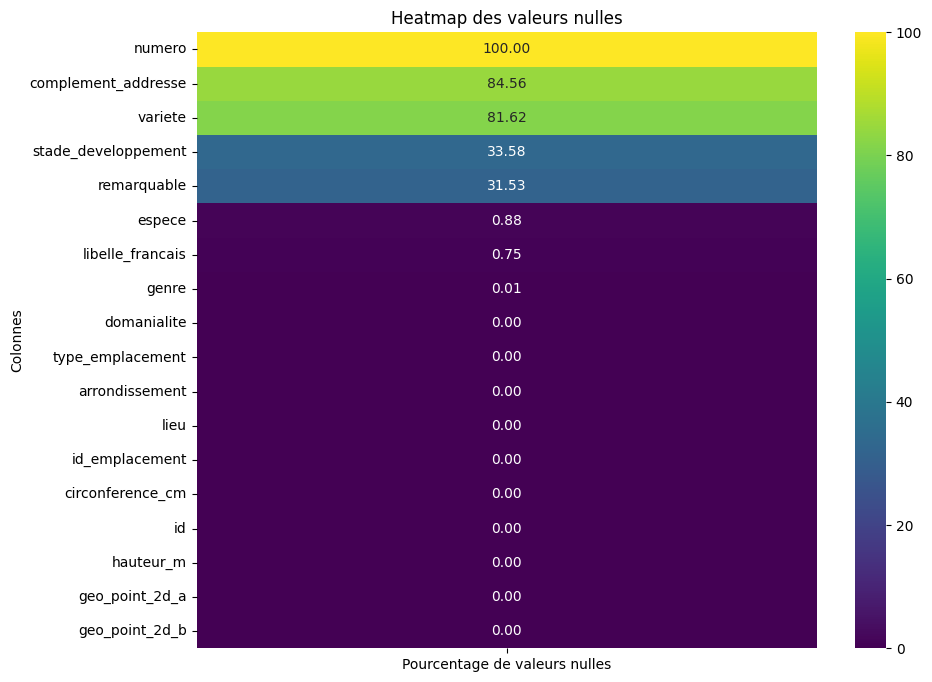

In [56]:
null_percentage=null_percentage.sort_values(ascending=False)
null_percentage_df = pd.DataFrame(null_percentage, columns=['Pourcentage de valeurs nulles'])
plt.figure(figsize=(10,8))
sns.heatmap(null_percentage_df,cmap='viridis', annot=True, fmt='.2f')
plt.title('Heatmap des valeurs nulles')
#plt.xlabel('Pourcentage valeurs nulles')
plt.ylabel('Colonnes')

### Nettoyage des données

In [40]:
# On supprime toute les colonnes que l'on ne souhaite pas utiliser

In [58]:
data.drop(['id','numero','complement_addresse','id_emplacement','libelle_francais','genre','espece','variete'], axis=1,inplace=True)
data.head()

,type_emplacement,domanialite,arrondissement,lieu,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,5,NaN,0.0,48.857620,2.320962
1,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,65,8,A,NaN,48.857656,2.321031
2,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,90,10,A,NaN,48.857705,2.321061
3,Arbre,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,60,8,A,NaN,48.857722,2.321006
4,Arbre,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,38,0,NaN,NaN,48.890435,2.315289


In [60]:
zero_counts = (data==0).sum()
zero_percentage = (zero_counts / len(data))*100
zero_percentage=zero_percentage.sort_values(ascending=False)
zero_percentage_df=pd.DataFrame(zero_percentage, columns=['Pourcentage de valeurs égales à zéro'])

Text(95.5815972222222, 0.5, 'Colonnes')

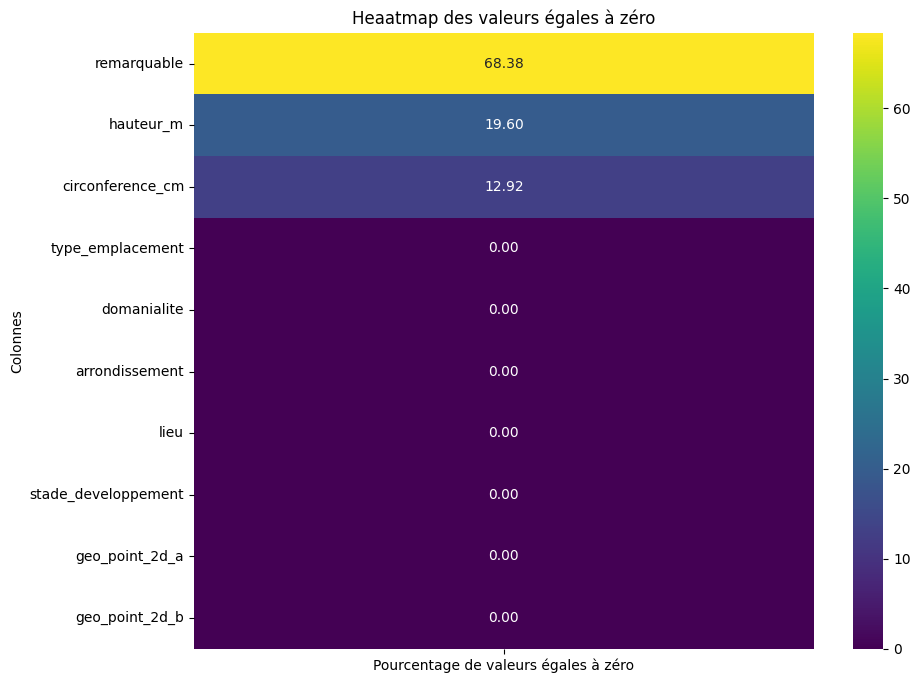

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(zero_percentage_df, cmap='viridis', annot=True, fmt='.2f')
plt.title('Heaatmap des valeurs égales à zéro')
plt.ylabel('Colonnes')

#### Les valeurs impossibles

In [95]:
max_height=50

num_tall_trees = (data['hauteur_m']>max_height).sum()
num_tall_trees_null = (data['hauteur_m']==0).sum()
print(f"Il y a {num_tall_trees} arbres ayant une hauteur de {max_height} m soit {((num_tall_trees/dimension[0])*100).round(2)} % du total des arbres")
print(f"et {num_tall_trees_null} arbres ayant une circonference null soit {((num_tall_trees_null/dimension[0])*100).round(2)} % du total des arbres")

Il y a 445 arbres ayant une hauteur de 50 m soit 0.22 % du total des arbres
et 39219 arbres ayant une circonference null soit 19.6 % du total des arbres


In [109]:
# on retire donc dans un premier temps la hauteur abérante en considérant un hauteur max de 50 m
data = data[data['hauteur_m'] <= max_height]
data.shape

(199692, 10)

In [111]:
max_circonference = 740
sorted_circonference = (data['circonference_cm']>max_circonference).sum()
numb_circonference_null = (data['circonference_cm']==0).sum()

print(f"Il y a {sorted_circonference} arbres ayant une circonference de plus de {max_circonference/100} m soit {((sorted_circonference/dimension[0])*100).round(2)} % du total des arbres")
print(f"et {numb_circonference_null} arbres ayant une circonference null soit {((numb_circonference_null/dimension[0])*100).round(2)} % du total des arbres")

Il y a 79 arbres ayant une circonference de plus de 7.4 m soit 0.04 % du total des arbres
et 25867 arbres ayant une circonference null soit 12.92 % du total des arbres


In [115]:
# on retire la circonférence supèrieur à max_circonférence.
data = data[data['circonference_cm'] <= max_circonference]
data.shape

(199613, 10)

# Démarche

Nous avons un jeu de données fournit par la ville de Paris.

## Connaitre notre jeu de données.
### On identifie:
1. les dimensions
2. le type de données
3. Les valeurs principales valeurs (Max, min, impossible, abérrantes)

#### On remarque:
- 200 137 lignes et 18 colonnes (18 variables potenielles à étudier)
- On remarque aussi des valeurs Max pour la hauteur de 881818m soit 881.818 kms et circonférence de 250255 cm soit 2502.55m. ce sont des valeurs impossible
- Idem pour les valeurs min. Un arbre ne peu pas exister et avoir une hauteur ou une circonférence de zero. Donc se sont des valeurs impossible.
- 
### Valeur nulles
- On comptabilise ensuite le nombre de valeurs null pour chaque variables
- On réalise une représentation graphique pour visualiser quelles variables ont le plus de valeur nulles ( ici sous forme de heatmap)
    - On peut supprimer les colonnes:
    - - 'id', 'numero', 'complement_addresse', 'id_emplacement',
    - 'libelle_francais','genre','espece','variete'
qui sont null quasiement à 100% donc inutile pour nous ou non pertinent pour notre analyse.

### Nettoyage des données

une fois les colonnes non utilisé supprimées, on traite les valeurs impossible.<br/>
<br/>
    - La hauteur :<br/>
**En 2021 un des arbres le plus haut à Paris faisait 30m**<br/>
https://agriculture.gouv.fr/lun-des-plus-grands-arbres-de-paris-veille-sur-le-78-rue-de-varenne<br/>
**on peut retrouver une data d'un arbre de 45m en 2006**<br/>
https://public.opendatasoft.com/explore/dataset/arbresremarquablesparis2011/table/?flg=fr-fr&sort=arbres_hauteur en m.<br/>
On prendra ne hauteur max de 50 m dans notre cas.<br/>
<br/>
    - La circonférence :<br/>

En 2006 la circonférence max des arbres à Paris était de 740 cm<br/>
https://public.opendatasoft.com/explore/dataset/arbresremarquablesparis2011/table/?flg=fr-fr&sort=arbres_hauteurenm<br/>
https://www.unjourdeplusaparis.caom/paris-vert/arbres-remarquables-paris<br/>

Les arbres au dessus seront donc considéré comme des valeurs abérantes.

---------------------------------------------------------
Prendre la decision des valeurs à garder


**4- compte les nombre de valeurs null pour chaque variables**
- on calcul leurs représentation en %.
- Pour une meilleurs visualisation, on affiche la répartition sous forme de heatmap<br/>

**5-représentation des valeurs nulles en heatmap**


Après avoir exploré le dataset, on peut réfléchir sur l'approche analytique
- on décide de supprimer les colonnes:
    
- nous allons aussi 

## Analyse univariee

In [ ]:
data.describe()

In [ ]:
data.describe(include='object')

In [ ]:
qualitative_vars = ['type_emplacement','domanialite','arrondissement','lieu','genre','stade_developpement']
quantitative_vars = ['circonference_cm','hauteur_m','geo_point_2d_a','geo_point_2d_b']

In [ ]:
type_counts = data['type_emplacement'].value_counts() # Répartissions des type d'emplacement
arrondissement_counts = data['arrondissement'].value_counts() # Distribution par arrondissement
stade_developpement_counts = data['stade_developpement'].value_counts() # Distribution par arrondissement

In [ ]:
fig, axs = plt.subplots(4,2,figsize=(16,17))

axs[0,0].pie(type_counts,labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axs[0,0].axis('equal')
axs[0,0].set_title('Répartitions des type d\'emplacement')

axs[0,1].bar(arrondissement_counts.index, arrondissement_counts)
axs[0,1].set_title('Distribution des arrondissements')
axs[0,1].set_xlabel('Arrondissement')
axs[0,1].set_ylabel('Nombre')
axs[0,1].set_xticks(range(len(arrondissement_counts)))
axs[0,1].set_xticklabels(arrondissement_counts.index, rotation=45, ha='right')

axs[1,0].bar(stade_developpement_counts.index, stade_developpement_counts)
axs[1,0].set_title('Distribution des stades de developpement')

sns.kdeplot(data['circonference_cm'], ax=axs[1,1], fill=True)
axs[1,1].set_title('Densité de la circonference des arbres')
axs[1,1].set_xlabel('circonference des arbres (cm)')
axs[1,1].set_ylabel('Densité')

sns.kdeplot(data['hauteur_m'], ax=axs[2,0], fill=True)
axs[2,0].set_title('Densité des arbres en hauteur')
axs[2,0].set_xlabel('Hauteur d\'arbre (m)')
axs[2,0].set_ylabel('Densité')

sns.boxplot(data['geo_point_2d_a'], ax=axs[2,1])
axs[2,1].set_title('Boite à moustache latitude des arbres')
axs[2,1].set_title('Latitude')

sns.boxplot(data['geo_point_2d_b'], ax=axs[3,0], orient='h')
axs[3,0].set_title('Boite à moustache longitude des arbres')
axs[3,0].set_title('Longitude')

fig.delaxes(axs[3,1])

plt.subplots_adjust(wspace=0.4, hspace=0.9)
plt.show()

In [ ]:
hauteur_max=data['hauteur_m'].max()
hauteur_min=data['hauteur_m'].min()
print(f'hauteur min {hauteur_min} m, et hauteur max {hauteur_max} m')
Nb_hauteur_null = (data['hauteur_m']==0).sum()
print(f'nombres de hauteur à zero {Nb_hauteur_null}')

In [ ]:
circonference_max=data['circonference_cm'].max()
circonference_min=data['circonference_cm'].min()
print(f'circonference min {circonference_min} cm, et circonference max {circonference_max} cm')
Nb_circonf_null = (data['circonference_cm']==0).sum()
print(f'nombres de circonférence à zero {Nb_circonf_null}')

## Detection et traitement de valeurs aberrantes

### Detection des valeurs null

In [ ]:
# on transforme ces résultat en pourcentage pour une meilleur lecture
non_null_percentage = (data.isnull().sum()/len(data))*100
print(f"\nNombre de données null en % :\n{non_null_percentage.round(2)}")

### Detection des valeurs abérantes pour la hauteur

### Utilisation de la méthode interquartilles

In [ ]:
def detect_outliers_(data, column):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR = Q3 -Q1
    lower_limit = Q1-1.5 * IQR
    upper_limit = Q3 + 1.5 *IQR
    outliers = (data[column]<lower_limit) | (data[column]>upper_limit)
    return outliers, lower_limit, upper_limit

commencons par la hauteur et affichons les 10 valeurs les plus grandes pour determiner lesquels des valeur sont "Impossible", "abérantes" ou "athypique"<br/>
**En 2021 un des arbres le plus haut à Paris faisait 30m**<br/>
https://agriculture.gouv.fr/lun-des-plus-grands-arbres-de-paris-veille-sur-le-78-rue-de-varenne<br/>
**on peut retrouver une data d'un arbre de 45m en 2006**<br/>
https://public.opendatasoft.com/explore/dataset/arbresremarquablesparis2011/table/?flg=fr-fr&sort=arbres_hauteurenm

In [ ]:
columnsToDisplay = ['circonference_cm', 'hauteur_m','geo_point_2d_a','geo_point_2d_b']

In [ ]:
outliers_hauteur, lower_hauteur, upper_hauteur = detect_outliers_(data,'hauteur_m')
print(f'Limites pour hauteur_m: inférieure = {lower_hauteur}, supérieure = {upper_hauteur}')

In [ ]:
# on retire donc dans un premier temps la hauteur abérante en considérant un hauteur max de 50 m
data = data[data['hauteur_m'] <= max_height]
data.describe()

#### Traitement des valeurs abérantes pour la hauteur

In [ ]:
#On va remplacer la valeur des arbres ayant une hauteur null par la  moyenne de la hauteur des arbres ayant une hauteur non null

# on selectionne les arbres ayant une hauteur non null
non_hauteur_null_list = data[data['hauteur_m'] != 0]

# on calcul la hauteur moyenne
mean_hauteur = non_hauteur_null_list['hauteur_m'].mean()
print(f"Hauteur moyenne calculée : {mean_hauteur.round(3)} m")

# On remplace la valeur de la hauteur par la moyenne caclulée
data.loc[data['hauteur_m']==0,'hauteur_m']= mean_hauteur
data.describe()

### Detection des valeurs abérantes pour la circonférence

In [ ]:
outliers_circonference, lower_circonference, upper_circonference = detect_outliers_(data,'circonference_cm')
print(f'Limites pour circonference: inférieure = {lower_circonference}, supérieure = {upper_circonference}')

En 2006 la circonférence max des arbres à Paris était de 740 cm<br/>
https://public.opendatasoft.com/explore/dataset/arbresremarquablesparis2011/table/?flg=fr-fr&sort=arbres_hauteurenm<br/>
https://www.unjourdeplusaparis.caom/paris-vert/arbres-remarquables-paris<br/>

Les arbres au dessus seront donc considéré comme des valeurs abérantes.

In [89]:
max_circonference = upper_circonference
sorted_circonference = (data['circonference_cm']>max_circonference).sum()
numb_circonference_null = (data['circonference_cm']==0).sum()

print(f"Il y a {sorted_circonference} arbres ayant une circonference de plus de {max_circonference/100} m soit {((sorted_circonference/dimension[0])*100).round(2)} % du total des arbres")
print(f"et {numb_circonference_null} arbres ayant une circonference null soit {((numb_circonference_null/dimension[0])*100).round(2)} % du total des arbres")

NameError: name 'upper_circonference' is not defined

#### Traitement des valeurs abérantes pour la circonférence

In [ ]:
# On peut raisonnablement supprimer du dataset les arbres ayant une circonférence supérieurs à max_circonference
data = data[data['circonference_cm'] <= max_circonference]

# on selectionne les arbres ayant une circonference non null
non_circonference_null_list = data[data['circonference_cm'] != 0]

# on calcul la circonference moyenne
mean_circonference = non_circonference_null_list['circonference_cm'].mean()
print(f"Circonference moyenne calculée : {mean_circonference.round(3)} cm")

# On remplace la valeur de la circonference pour les indivdus ayant une valeur null par la moyenne caclulée
data['circonference_cm']= data['circonference_cm'].replace(0, mean_hauteur)

In [ ]:
data.describe()

### Traitement des valeur de stade de developpement

In [ ]:
# On liste et on affiche les valeurs possible pour le stade de developpement
unique_stade_developpement = data['stade_developpement'].unique()
print(f'List des valeurs possible dans la colonne stade de développement {unique_stade_developpement}')

# On compte les valeur null dans la colonne stade de developpement
total_nan = data['stade_developpement'].isnull().sum()
print(f'total nan {total_nan}')

# On compte le nombre pour chaque stade
stade_developpement_counts = data['stade_developpement'].value_counts()
print(f'Nombre d\individus pour chaque cas dans {stade_developpement_counts}')


In [ ]:
# Maintenant que l'on a 100% des valeurs hauteur_m et circonference_m dans notre dataSet
# On veut compléter la colonne stade de développement pour chaque arbres de notre dataSet
# Une approche simple consiste a determnier le ratio H/D pour chaque individus puis on définit le ratio moyen pour chaque stade_developpemt
data['ratio_H_D'] = ((data['hauteur_m']*100)/(data['circonference_cm'])).round(2)
data_filtered = data.dropna(subset=['stade_developpement'])
stats = data_filtered.groupby('stade_developpement').agg({
    'hauteur_m': ['max', 'min', 'mean'],
   'circonference_cm': ['max', 'min', 'mean'],
  'ratio_H_D': ['max', 'min', 'mean']
}).reset_index()
print(stats)

In [ ]:
# on constate une coherence. Plus notre arbre est jeune plus le ratio H/D est grand.
# Cela est due à la pousse des arbres qui dans un premier temps grandissent plus qu'il ne grossisse
# On extrait les ratio poyen de chaque stade de developpement

mean_ratios = stats.set_index('stade_developpement')['ratio_H_D']['mean']
print(mean_ratios)

In [ ]:
def impute_stade_developppement(row,mean_ratios):
    if pd.isna(row['stade_developpement']):
        if row['ratio_H_D']<=mean_ratios['M']:
            return 'M'
        elif row['ratio_H_D']<=mean_ratios['A']:
            return 'A'
        elif row['ratio_H_D']<= mean_ratios['JA']:
            return 'JA'
        else:
            return 'J'
    else:
        return row['stade_developpement']

In [ ]:
data_copy = data.copy()
data_copy['stade_developpement'] = data.apply(impute_stade_developppement, axis =1, mean_ratios = mean_ratios)
data_copy.info()

In [ ]:
matures = data_copy[data_copy['stade_developpement']=='M']
adultes = data_copy[data_copy['stade_developpement']=='A']
jeunes_adultes = data_copy[data_copy['stade_developpement']=='JA']
jeunes = data_copy[data_copy['stade_developpement']=='J']

In [ ]:
# Compter le nombre d'arbres par stade de développement et par quartier
matures_count = matures['arrondissement'].value_counts().reset_index()
matures_count.columns = ['arrondissement', 'nombre_matures']

adultes_count = adultes['arrondissement'].value_counts().reset_index()
adultes_count.columns = ['arrondissement', 'nombre_adultes']

jeunes_adultes_count = jeunes_adultes['arrondissement'].value_counts().reset_index()
jeunes_adultes_count.columns = ['arrondissement', 'nombre_jeunes_adultes']

jeunes_count = jeunes['arrondissement'].value_counts().reset_index()
jeunes_count.columns = ['arrondissement', 'nombre_jeunes']

In [ ]:
# On fusionne chaque données par quartier
merged_data = pd.merge(matures_count, adultes_count, on='arrondissement', how='outer')
merged_data = pd.merge(merged_data, jeunes_adultes_count, on='arrondissement', how='outer')
merged_data = pd.merge(merged_data, jeunes_count, on='arrondissement', how='outer')

In [ ]:
plt.figure(figsize=(12,8))
heatmap_data = merged_data.set_index('arrondissement')
sns.heatmap(heatmap_data, annot=True, fmt="d", linewidth=.1)
plt.title('Heatmap des arbres par quartier')
plt.xlabel('Stade de developpement')
plt.ylabel('Arrondissement')
plt.show()

In [ ]:
# On peut classer les arbres comme suit:
#https://bauchery.fr/blog/72_guide-des-tailles-et-qualite-des-plants.html#:~:text=%2D%20Un%20baliveau%20est%20un%20arbre,2%20m%20et%202.50%20m.&text=Ce%20rapport%20est%20variable%20suivant,plus%20grand%20qu'un%20noyer.
# Jeune ou baliveau H < 2.5m et circonference ~ 6cm
# Jeune Adulte 2.5m < H < 4m et circonference < 15cm
# data_min=data[(data['circonference_cm']<=16) & (data['hauteur_m']< 4) & (data['stade_developpement'].isnull())]
# data_min.describe()